Saving EastWestAirlines.xlsx to EastWestAirlines.xlsx
First few rows of the dataset:
   ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0    1    28143           0          1          1          1          174   
1    2    19244           0          1          1          1          215   
2    3    41354           0          1          1          1         4123   
3    4    14776           0          1          1          1          500   
4    5    97752           0          4          1          1        43300   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award?  
0            1                  0                0               7000       0  
1            2                  0                0               6968       0  
2            4                  0                0               7034       0  
3            1                  0                0               6952       0  
4           26               2077                4  

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

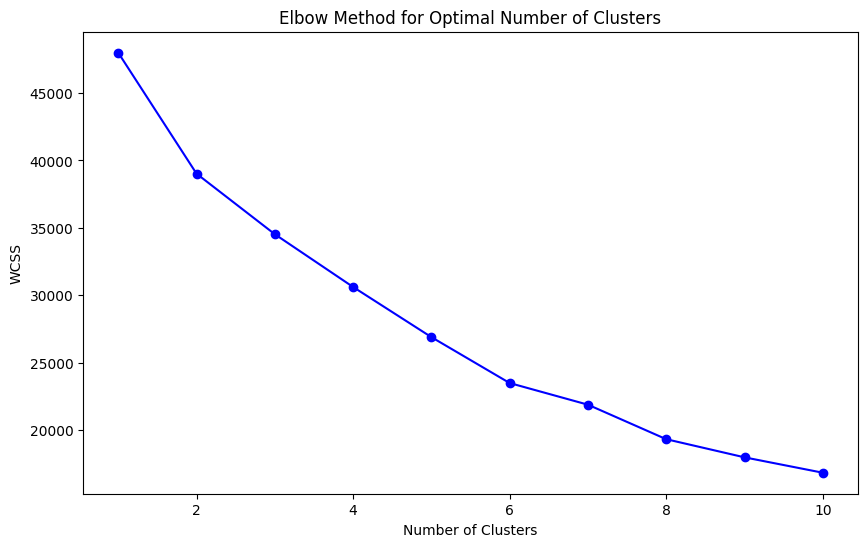

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


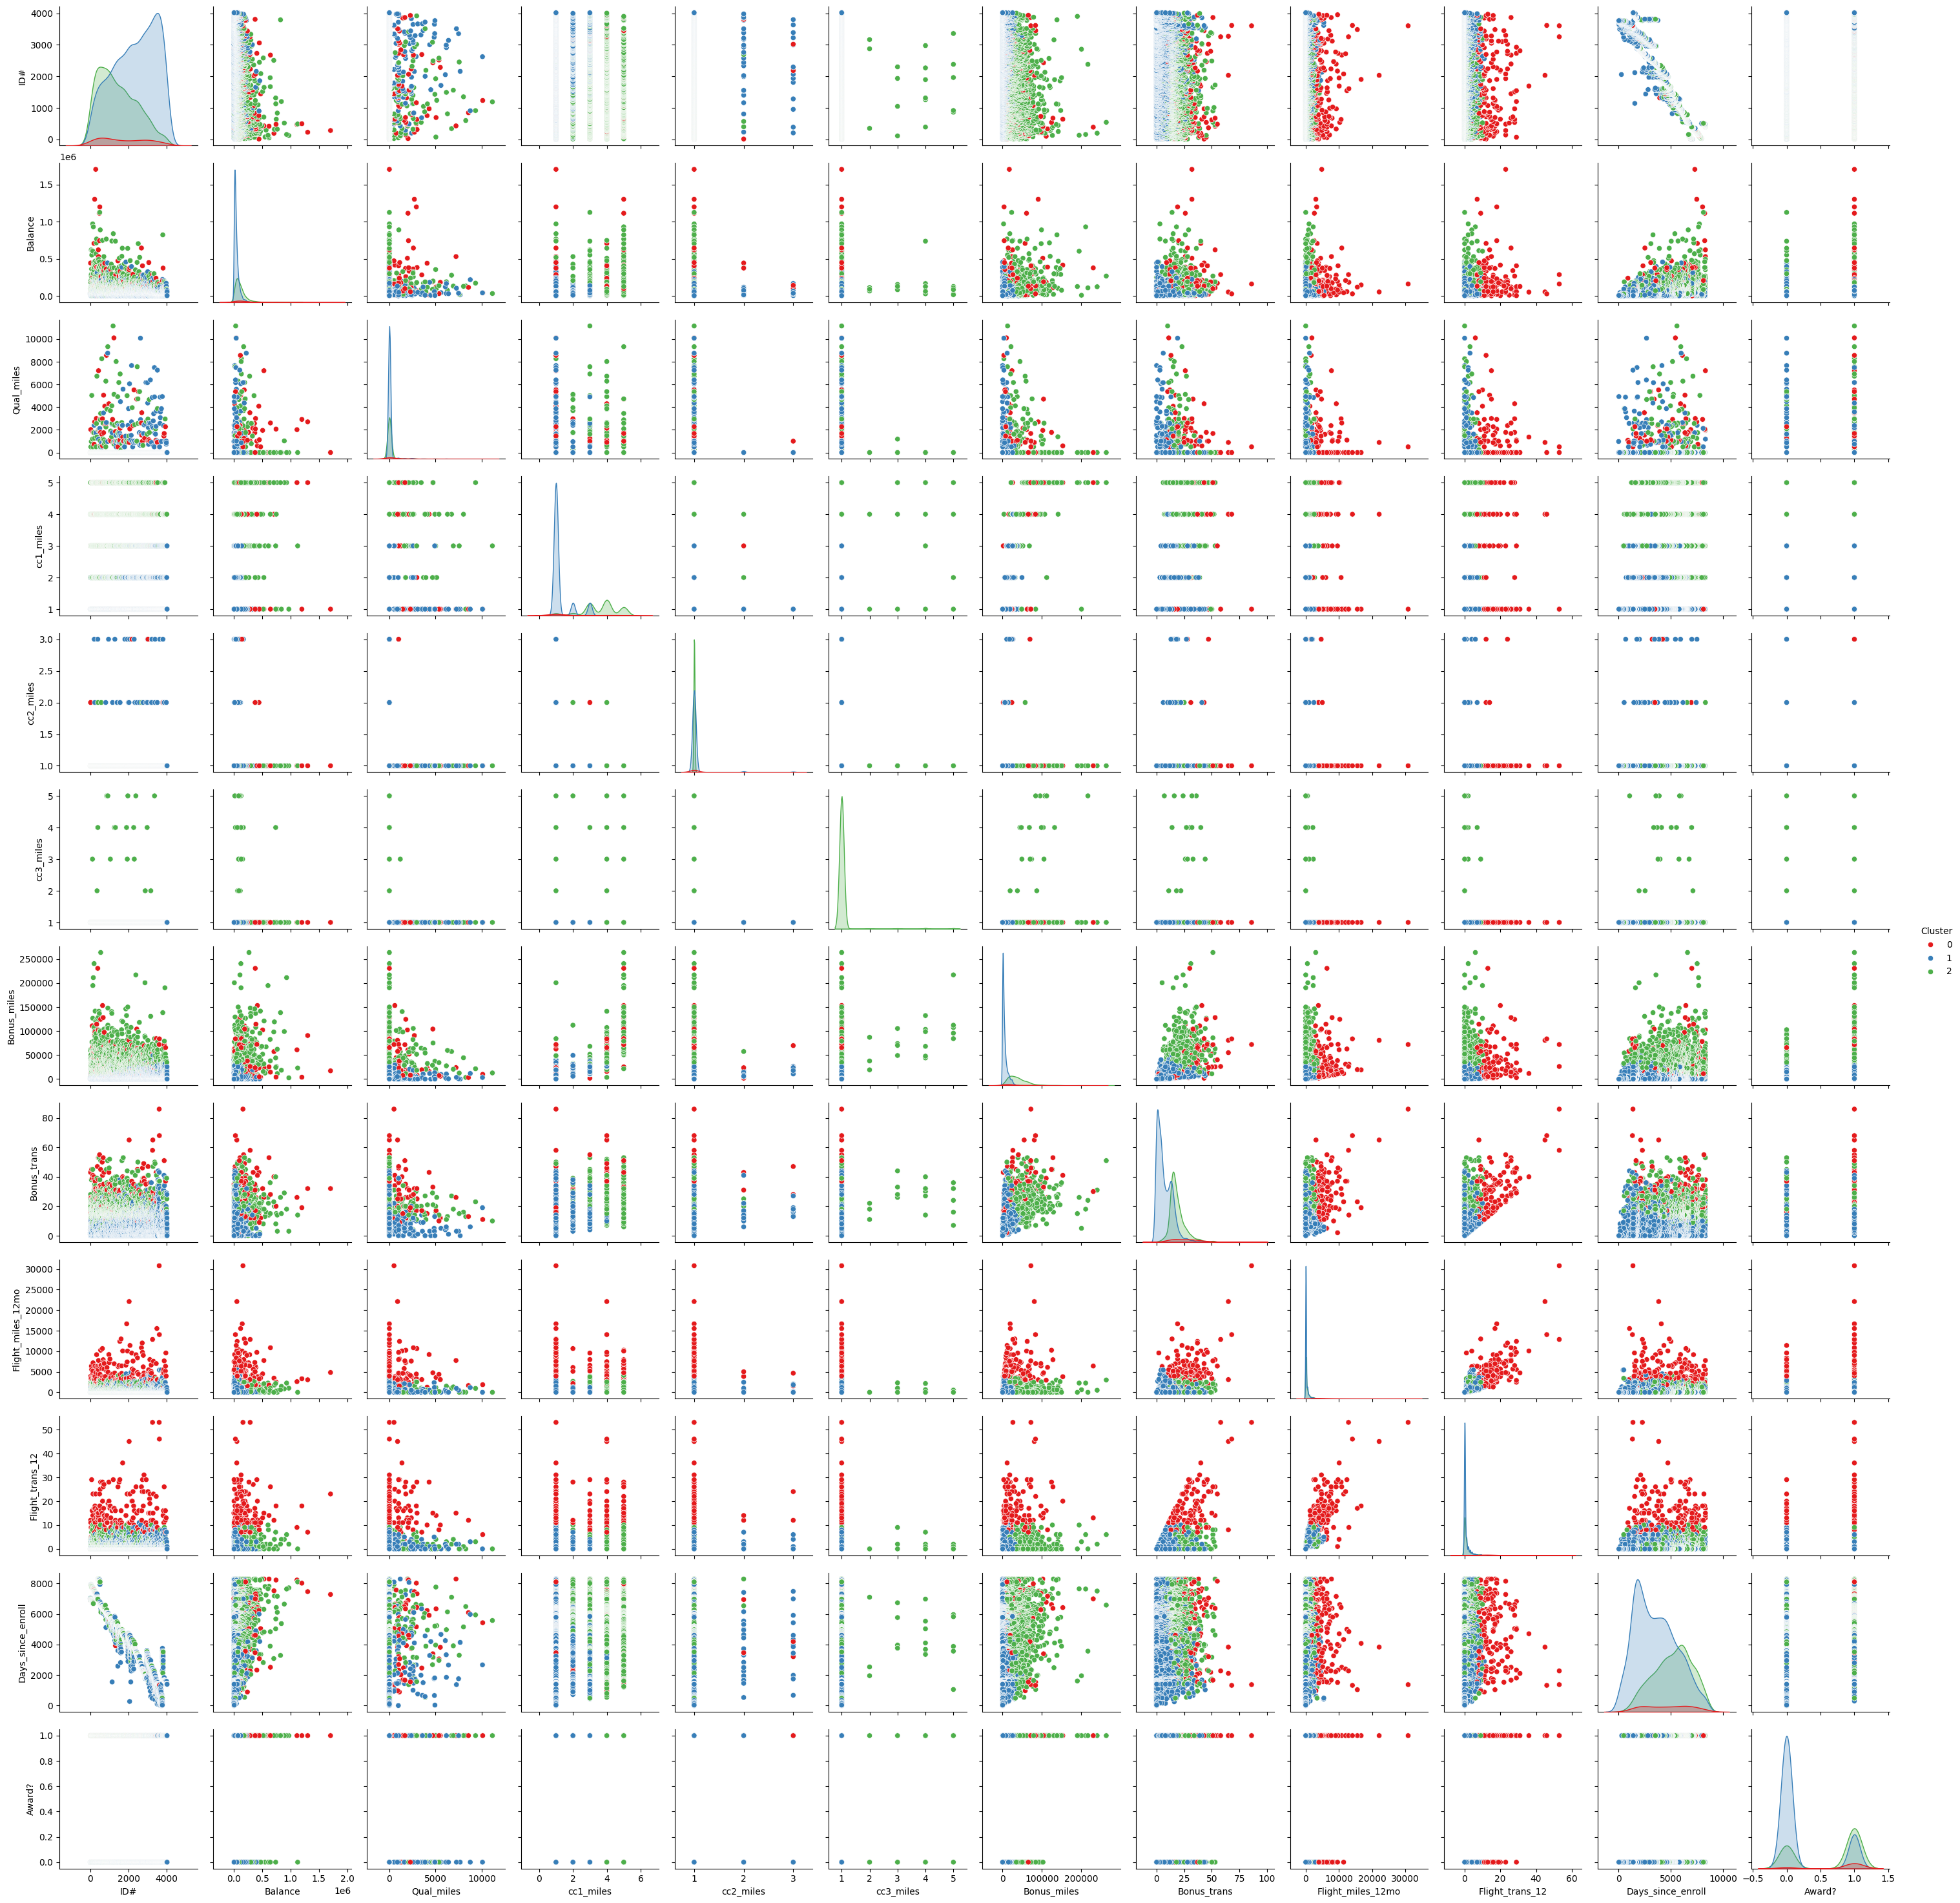

Cluster Centers:
[[-0.22547568  1.14826697  0.83324966  0.08964024  0.14957307 -0.06276658
   0.60608195  1.61559764  3.5430272   3.81466428  0.26077939  0.91247937]
 [ 0.26660117 -0.31077841 -0.06695064 -0.59071836  0.03294658 -0.06276658
  -0.50693943 -0.47919321 -0.18918909 -0.20344807 -0.27307252 -0.34292965]
 [-0.48852333  0.45820199  0.02508213  1.13395896 -0.08267037  0.12957331
   0.90663549  0.72597762 -0.07847361 -0.08496653  0.49663268  0.55016506]]
Cluster Value Counts:
Cluster
1    2530
2    1305
0     164
Name: count, dtype: int64


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from google.colab import files

# Upload the file
uploaded = files.upload()

# Read the uploaded Excel file
df = pd.read_excel(next(iter(uploaded.keys())), sheet_name='data')  # Adjust the sheet name if needed

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

# Display column names to understand the structure
print("\nColumn names in the dataset:")
print(df.columns)

# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# Dropping non-numeric or identifier columns if necessary
# Check if the 'ID' column exists and drop it if present
if 'ID' in df.columns:
    df_processed = df.drop(columns=['ID'])
else:
    df_processed = df.copy()

# Scaling the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_processed)

# Finding the optimum number of clusters using the Elbow Method
wcss = []  # Within-cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Fitting K-means with the optimal number of clusters (example: 3)
optimal_clusters = 3  # Adjust based on Elbow plot
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)

# Visualizing the clusters (pairplot)
sns.pairplot(df, hue='Cluster', palette='Set1')
plt.show()

# Display the cluster centroids
print("Cluster Centers:")
print(kmeans.cluster_centers_)

# Show cluster counts
print("Cluster Value Counts:")
print(df['Cluster'].value_counts())

# Saving the clustered data to a new Excel file
df.to_excel('EastWestAirlines_Clustered.xlsx', index=False)

# Download the file to your local machine
files.download('EastWestAirlines_Clustered.xlsx')